In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/real-world-restaurant-dataset/Dataset .csv


In [2]:
## Task 1: Restaurant Rating Prediction

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


In [16]:
df = pd.read_csv("/kaggle/input/real-world-restaurant-dataset/Dataset .csv")
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [17]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [18]:
df = df.dropna(subset=['Aggregate rating'])

In [19]:
num_cols = ['Average Cost for two', 'Votes']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())


In [20]:
cat_cols = ['City', 'Cuisines', 'Currency', 
            'Has Online delivery', 'Has Table booking']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [21]:
from sklearn.preprocessing import LabelEncoder

le_city = LabelEncoder()
le_cuisine = LabelEncoder()

df['City'] = le_city.fit_transform(df['City'])
df['Cuisines'] = le_cuisine.fit_transform(df['Cuisines'])

df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})
df['Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})


In [22]:
features = [
    'City',
    'Cuisines',
    'Average Cost for two',
    'Price range',
    'Votes',
    'Has Online delivery',
    'Has Table booking'
]

X = df[features]
y = df['Aggregate rating']


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [24]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)


In [26]:
def rating_category(r):
    if r <= 2.5:
        return 0   # Poor
    elif r <= 3.5:
        return 1   # Average
    elif r <= 4.0:
        return 2   # Good
    else:
        return 3   # Excellent

df['Rating_Category'] = df['Aggregate rating'].apply(rating_category)


In [27]:
X_cat = df[['City', 'Cuisines', 'Average Cost for two',
            'Price range', 'Votes',
            'Has Online delivery', 'Has Table booking']]

y_cat = df['Rating_Category']


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X_cat, y_cat, test_size=0.2, random_state=42
)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred_cat = clf.predict(X_test)


In [29]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))


Accuracy: 0.7708006279434851
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       468
           1       0.80      0.86      0.83       830
           2       0.54      0.53      0.53       383
           3       0.67      0.59      0.63       230

    accuracy                           0.77      1911
   macro avg       0.74      0.72      0.73      1911
weighted avg       0.77      0.77      0.77      1911



In [ ]:
## Initially, a regression model was built to predict the aggregate rating directly. To improve the model and make predictions more interpretable, the aggregate rating was further categorized into quality levels such as Poor, Average, Good, and Excellent. A classification model was then trained using the same features to predict these categories.

In [ ]:
## TASK 2: RESTAURANT RECOMMENDATION SYSTEM

In [30]:
rec_df = df[['Restaurant Name', 'City', 'Cuisines',
             'Average Cost for two', 'Price range']]

In [31]:
from sklearn.preprocessing import LabelEncoder

le_city = LabelEncoder()
le_cuisine = LabelEncoder()

rec_df['City_enc'] = le_city.fit_transform(rec_df['City'])
rec_df['Cuisine_enc'] = le_cuisine.fit_transform(rec_df['Cuisines'])


/tmp/ipykernel_55/1411917218.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rec_df['City_enc'] = le_city.fit_transform(rec_df['City'])
/tmp/ipykernel_55/1411917218.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rec_df['Cuisine_enc'] = le_cuisine.fit_transform(rec_df['Cuisines'])


In [32]:
features = rec_df[['City_enc', 'Cuisine_enc',
                    'Average Cost for two', 'Price range']]


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [34]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(features_scaled)


In [35]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(features_scaled)


In [36]:
def recommend_restaurants(restaurant_name, top_n=5):
    if restaurant_name not in rec_df['Restaurant Name'].values:
        return "Restaurant not found"

    idx = rec_df[rec_df['Restaurant Name'] == restaurant_name].index[0]
    sim_scores = list(enumerate(similarity_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    top_indices = [i[0] for i in sim_scores[1:top_n+1]]

    return rec_df.iloc[top_indices][
        ['Restaurant Name', 'City', 'Cuisines',
         'Average Cost for two', 'Price range']
    ]

In [37]:
recommend_restaurants("Domino's Pizza", top_n=5)

,Restaurant Name,City,Cuisines,Average Cost for two,Price range
635,Dasaprakash Restaurant,1,1714,550,2
760,Manohar Dairy And Restaurant,16,1585,400,2
761,Manohar Dairy And Restaurant,16,1585,400,2
732,Onesta,14,1622,600,2
733,Onesta,14,1622,600,2


In [ ]:
## A content-based recommendation system was developed using restaurant attributes such as city, cuisine type, price range, and average cost. These features were encoded and normalized, and cosine similarity was used to measure similarity between restaurants. Based on user preference for a specific restaurant, similar restaurants were recommended

In [ ]:
## Task 3: Cuisine Classification


In [39]:
features = [
    'City',
    'Average Cost for two',
    'Price range',
    'Votes',
    'Has Online delivery',
    'Has Table booking'
]

X = df[features]
y = df['Cuisines']

In [40]:
X = df[features].copy()

In [41]:
X['Has Online delivery'] = X['Has Online delivery'].map({'Yes': 1, 'No': 0})
X['Has Table booking'] = X['Has Table booking'].map({'Yes': 1, 'No': 0})

In [43]:
from sklearn.preprocessing import LabelEncoder

le_city = LabelEncoder()
X['City'] = le_city.fit_transform(X['City'])


In [44]:
le_cuisine = LabelEncoder()
y = le_cuisine.fit_transform(y)


In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [46]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [47]:
y_pred = clf.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.0847723704866562
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         0
          21       0.00      0.00      0.00         0
          22       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         0
          27       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         

In [50]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(
    y_test,
    y_pred,
    output_dict=True,
    zero_division=0
)

pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,5.000000
8,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...
1822,0.000000,0.000000,0.000000,0.000000
1823,0.000000,0.000000,0.000000,1.000000
accuracy,0.084772,0.084772,0.084772,0.084772
macro avg,0.012649,0.013390,0.012487,1911.000000


In [ ]:
#“The model performs well for frequently
occurring cuisines but shows lower recall for 
less-represented cuisines. This indicates class 
imbalance, which affects prediction performance.

    
Challenges & Biases (VERY IMPORTANT for marks)

Some cuisines appear more frequently than others

Rare cuisines have lower recall

Model is biased toward popular cuisines

Can be improved using:

Class balancing

More features

Cuisine grouping

In [ ]:
## Task 4: Location-based Analysis

In [51]:
loc_df = df[['City', 'Latitude', 'Longitude',
             'Aggregate rating',
             'Average Cost for two',
             'Price range']]

In [52]:
loc_df = loc_df.dropna(subset=['Latitude', 'Longitude'])


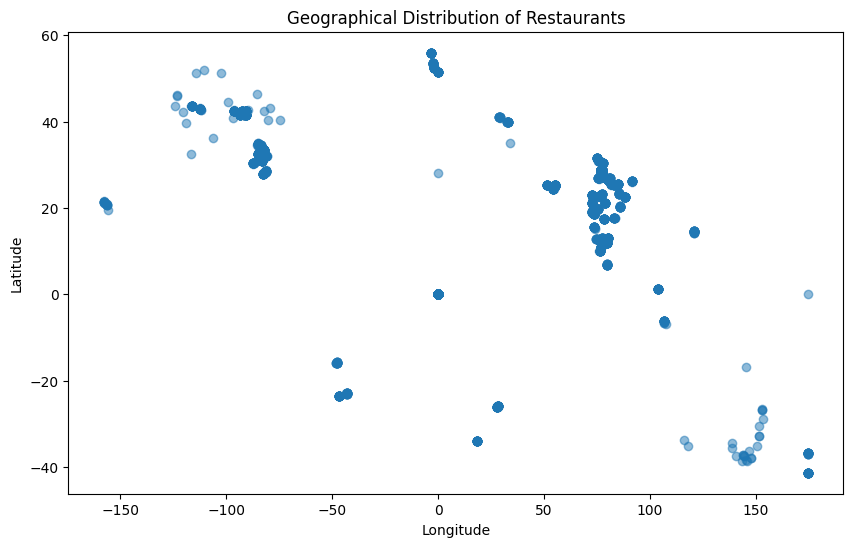

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(loc_df['Longitude'], loc_df['Latitude'], alpha=0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Distribution of Restaurants")
plt.show()

In [54]:
import folium

m = folium.Map(
    location=[loc_df['Latitude'].mean(), loc_df['Longitude'].mean()],
    zoom_start=4
)

for _, row in loc_df.sample(300).iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=2,
        popup=f"Rating: {row['Aggregate rating']}",
        fill=True
    ).add_to(m)

m

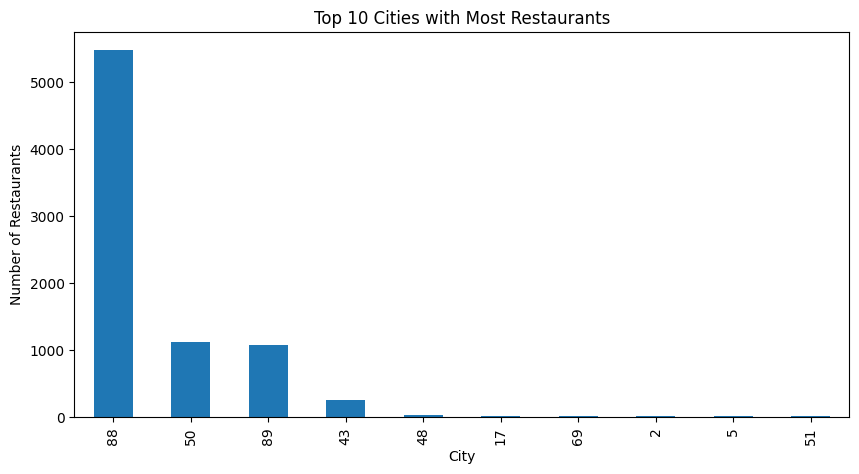

In [55]:
city_count = df['City'].value_counts().head(10)

city_count.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Cities with Most Restaurants")
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.show()


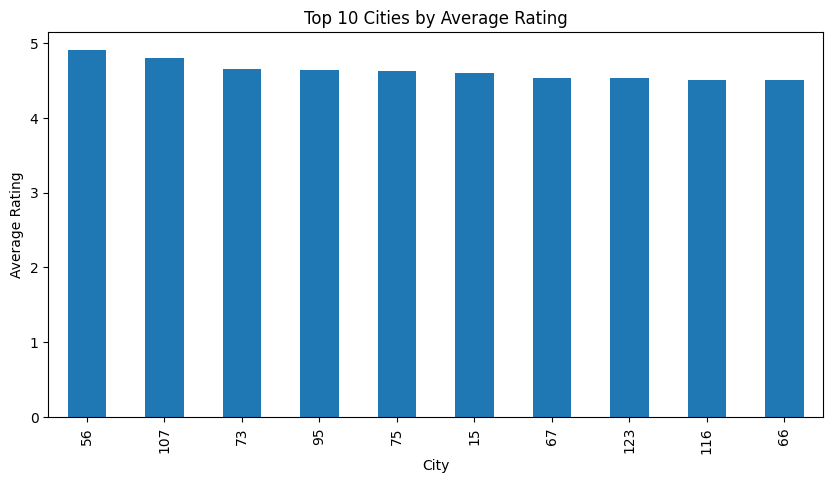

In [56]:
avg_rating_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

avg_rating_city.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Cities by Average Rating")
plt.ylabel("Average Rating")
plt.show()


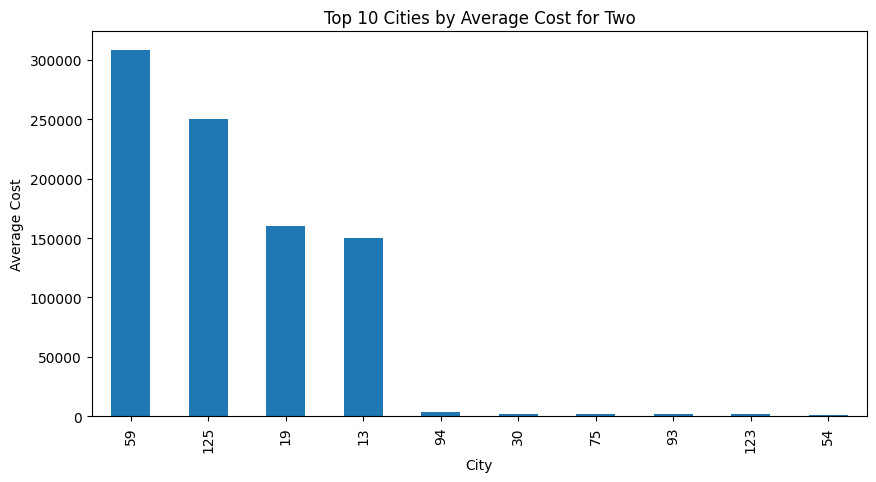

In [57]:
avg_price_city = df.groupby('City')['Average Cost for two'].mean().sort_values(ascending=False).head(10)

avg_price_city.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Cities by Average Cost for Two")
plt.ylabel("Average Cost")
plt.show()


In [ ]:
A location-based analysis was performed using 
latitude and longitude to visualize restaurant 
distribution. Cities were analyzed based on 
restaurant concentration, average ratings, and 
pricing patterns. The analysis revealed that major
cities have higher restaurant density, while 
certain cities achieve higher average ratings 
despite fewer establishments.”